# <span style="color:darkblue"> Lecture 20 - Time Data </span>

<font size = "5">

In  the last lecture we ...
- Completed the module on SQL
- Learned about escape characters


In  this lecture we will ...

- Process time data in Python
- Learn about wildcards

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs
# "maplotlib.dates" has advanced options for plotting dates
# "datetime" handles date information

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

Import data

In [69]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

"Parse" time columns

In [70]:
# Convert string column to datetime format
# If the date format is simple, you can also parse on input as
# financial = pd.read_csv("data_raw/financial.csv",parse_dates = ["date"]
# See advanced options for parsing further in the lecture...

financial["date"] = pd.to_datetime(financial["date_str"])
financial.dtypes




date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "5">

Visualize time data

Text(0.5, 1.0, 'The evolution of the stock market')

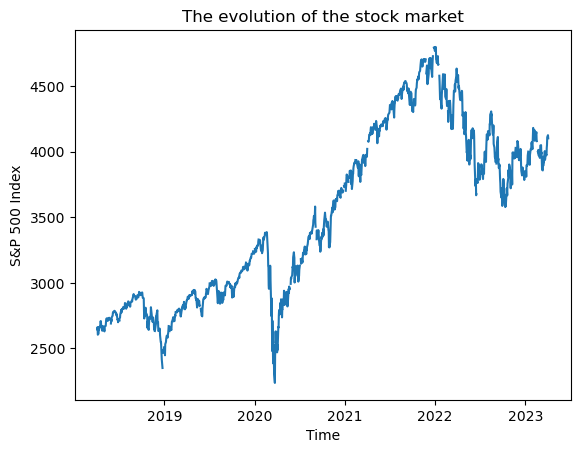

In [72]:
# plt.plot() is used to create line plots
# The first two arguments are column names for the (x,y) data
# The third argument is the data
# Make sure that the data is sorted, since the lines will be connected
# based on the order of the dataset

plt.plot("date", "sp500",
          data = financial.sort_values("date",ascending = False))
plt.xlabel("Time")
plt.ylabel("S&P 500 Index")
plt.title("The evolution of the stock market")



<font size = "5">

S&P 500 tracks the average performance of <br>
of the largest companies in the US stock market

$\quad$ https://en.wikipedia.org/wiki/S%26P_500 <br>
$\quad$ https://fred.stlouisfed.org/series/SP500

<font size = "5">

Try it yourself!

- Generate a line plot which has the Dow Jones <br>
Industrial Index ("djia") on the y-axis and <br>
"date" on the x-axis.

KeyError: 'month_str'

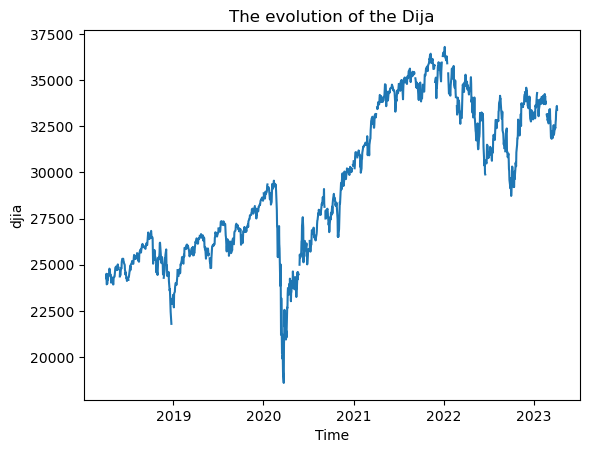

In [73]:
# Write your own code
plt.plot("date", "djia",
          data = financial)
plt.xlabel("Time")
plt.ylabel("djia")
plt.title("The evolution of the Dija")

# <span style="color:darkblue"> II. Dates + Wild Cards  </span>

<font size = "5">

Convert to string (a)


- A wildcard ```%``` is used to denote date formats
- Useful when working with text data

$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

In [13]:
# "String from time" .dt.strftime()
# The first argument needs to be a datetime type 
# The second argument is the format you want to use
# Note: "dt" stands for datatime

financial["month_str"] = financial["date"].dt.strftime("%m")
financial["week_str"]  = financial["date"].dt.strftime("%W")


0       04-04-2018-14
1       04-05-2018-14
2       04-06-2018-14
3       04-09-2018-15
4       04-10-2018-15
            ...      
1300    03-29-2023-13
1301    03-30-2023-13
1302    03-31-2023-13
1303    04-03-2023-14
1304    04-04-2023-14
Name: date, Length: 1305, dtype: object

<font size = "5">

Convert to string (b)

$\quad$ <img src="figures/wildcards_fig2.png" alt="drawing" width="400"/>

In [66]:
financial["monthname"]   =  financial["date"].dt.strftime("%B")
financial["weekdayname"] =  financial["date"].dt.strftime("%A")

<font size = "5">

Personalized format

In [75]:
# Insert wildcards inside custom strings
# Internally it will "fill-in-the-blank" with the corresponding information
# You can use commas, dashes (--), slash (/) or other characters

message_monthname =  financial["date"].dt.strftime("This is the month of %B")
message_monthday  =  financial["date"].dt.strftime("The day of the week is %A")
message_yearmonth =  financial["date"].dt.strftime("%Y-%m")

<font size = "5">

Try it yourself!

- Create a new column called "date_test" <br>
  which has the format using ```.dt.strftime()```
  
$\quad$ ```Monday, December 31, 2023 ```

In [78]:
# Write your own code
financial["date"].dt.strftime("%A, %B %d, %Y")

0       Wednesday, April 04, 2018
1        Thursday, April 05, 2018
2          Friday, April 06, 2018
3          Monday, April 09, 2018
4         Tuesday, April 10, 2018
                  ...            
1300    Wednesday, March 29, 2023
1301     Thursday, March 30, 2023
1302       Friday, March 31, 2023
1303       Monday, April 03, 2023
1304      Tuesday, April 04, 2023
Name: date, Length: 1305, dtype: object

# <span style="color:darkblue"> III. Data Operations </span>

<font size = "5">

Parsing + wild cards

$\quad$ <img src="figures/wildcards_fig3.png" alt="drawing" width="400"/>

In [88]:
# Combine wildcards + characters depending on the input
# Can include spaces, commas, "/", "-" or any other formatting
# Be careful to include the wildcar letters in upper or lower case 
# depending on the intended format 

date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
date2 = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")



0       True
1       True
2       True
3       True
4       True
        ... 
1300    True
1301    True
1302    True
1303    True
1304    True
Name: date_ex2, Length: 1305, dtype: bool

**Does the following line of code work?** ```pd.to_datetime(financial["date_ex1"], format = "%A, %Y-%m-%d")```

<font size = "5">

Period grouping

In [90]:
# In "freq" specify the letter for the level of aggregation
# year (y), month (m), week (w), day(d)
# There are also more advanced options! See documentation

month_config = pd.Grouper(key='date', freq='m')


<font size = "5">

Aggregate by period

In [98]:
# Group on the period column
# We use a wrapper () to split the command into multiple lines
# The ".reset_index()" option ensures that the grouper is
# converted to a column. This is important for plotting.
# There's a lot of options to 

monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())


,date,sp500_mean
0,2018-04-30,2659.463158
1,2018-05-31,2701.493636
2,2018-06-30,2754.352857
3,2018-07-31,2793.643333
4,2018-08-31,2857.820435
...,...,...
56,2022-12-31,3912.380952
57,2023-01-31,3960.656500
58,2023-02-28,4079.684737
59,2023-03-31,3968.559130


<font size = "5">

Plot aggregate data

Text(0.5, 1.0, 'Monthly average stock market performance')

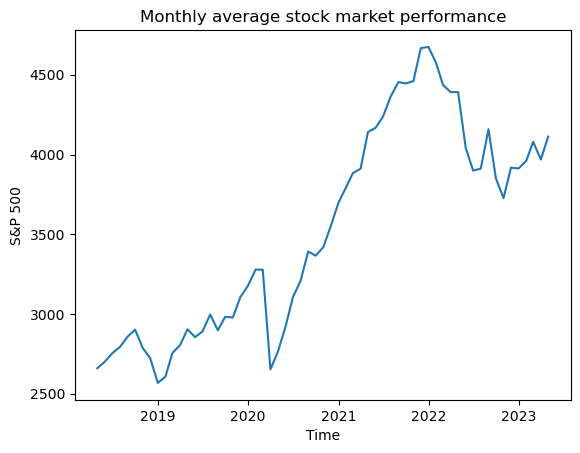

In [93]:
plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Monthly average stock market performance")

<font size = "5">

Try it yourself!

- Practice ```pd.to_datetime()```
- Parse the column "data_ex3"
- Take a close look at the formatting

HINT: Refer to the table of wildcards <br>
 in the previous section


In [116]:
# Write your own code

pd.to_datetime(financial['date_ex3'], format="%d-%b-%y")



0      2018-04-04
1      2018-04-05
2      2018-04-06
3      2018-04-09
4      2018-04-10
          ...    
1300   2023-03-29
1301   2023-03-30
1302   2023-03-31
1303   2023-04-03
1304   2023-04-04
Name: date_ex3, Length: 1305, dtype: datetime64[ns]

<font size = "5">



<font size = "5">

Try it yourself!

- Compute an aggregate dataset which computes the standard <br>
deviation of the S&P 500 at the weekly level.
- Generate a line plot with your results


Text(0.5, 1.0, 'Weekly std stock market performance')

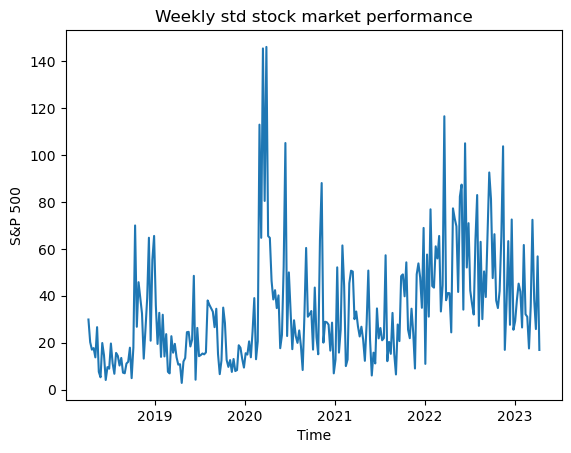

In [120]:
# Write your own code
sp500_weekly_std = (financial
               .groupby(pd.Grouper(key='date', freq='w')) 
               .agg(sp500_std = ("sp500","std"))
               .reset_index())


plt.plot("date","sp500_std",
          data = sp500_weekly_std.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly std of stock market performance")


# <span style="color:darkblue"> IV. Additional Material </span>

<font size = "5">

Full list of wild cards:

- More fine-grained, e.g. microseconds, etc.
- Other formats, e.g. time zone, "AM/PM", etc.

https://www.w3schools.com/python/python_datetime.asp